# customer dataset related to a telecommunication company

For this project we will be using customer dataset related to a telecommunication company, we will be using classification algorthms such as KNN(K Nearest Neighbor) to predict the category of customers, and evaluate the accuracy of our model.



# About the Dataset

About the dataset
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour

# Let us import all needed Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

# Loading the teleCust Dataset

In [5]:
data=pd.read_csv(r"C:\Users\Lindelani\Downloads\teleCust1000t.csv")


we now viewing first 5 dataset

In [6]:
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# Data Visualisations and Analysis

let us see how many of each class is in our dataset

In [7]:
data["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Basic service has 266 values,217 values for E-Service customers, 281 values for plus servie,236 values for total service

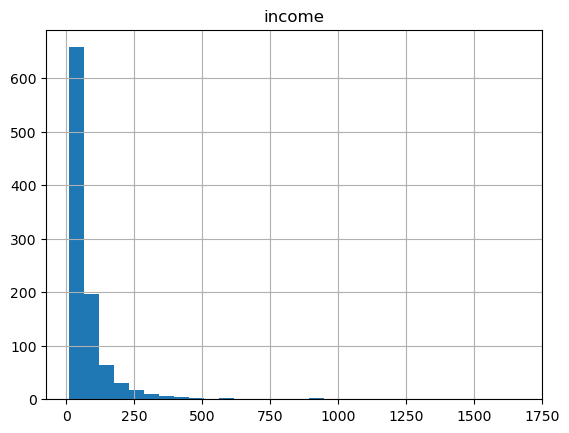

In [8]:
data.hist(column="income", bins=30)
plt.show()

# Feature set

we want define feature set as X

In [9]:
data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [10]:
x=data.drop("custcat",axis=1)

In [11]:
x.values

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [12]:
y=data["custcat"].values

In [13]:
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2], dtype=int64)

# Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


From the code above we can see that training set has 800 rows and 11 coumns while Test set has 200 rows and 11 columns after splitting the data

# Normalisation of Data 

Data standardization gives the data zero mean and unit variance, for the best it is the good practise for algorthms such as K Nearest Neigbhour which is mostly based on distance of data poitns

In [15]:
x_train_norm=preprocessing.StandardScaler().fit(x_train).transform(x_train.astype(float))

In [16]:
x_train_norm[0:5]

array([[-1.28618818e+00, -1.53085556e+00, -8.49354628e-01,
         1.00752834e+00, -7.46393214e-01, -4.83608776e-01,
         1.12305195e+00, -7.02283455e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02,  2.51253999e-01,  3.44957012e-01,
         1.00752834e+00,  2.45326718e-01, -2.71543263e-01,
        -5.40728715e-01, -1.25385370e-04, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-1.28618818e+00, -7.80493639e-01, -6.90113076e-01,
         1.00752834e+00, -5.21892614e-02, -4.92444839e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02, -1.53085556e+00, -3.71629972e-01,
        -9.92527915e-01,  1.46154725e-01, -4.74772713e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
         9.90049504e-01, -9.33814526e-01],
       [ 1.19022709e+00, -2.17722200e-01, -6.10492300e-01,
        -9.92527915e-01, -2.50533248e-01,  2.40948394e-01,
  

In [17]:
# we now normalizing the test data

In [18]:
x_test_norm=preprocessing.StandardScaler().fit(x_test).transform(x_test.astype(float))
x_test_norm[0:5]

array([[-1.13100942, -0.93533648, -0.93817795,  1.02020406, -0.36233308,
         0.17102716, -0.58336825,  0.00666863, -0.21707238, -1.13967126,
         1.97590703],
       [-1.13100942, -1.44823286, -0.13972863, -0.98019606,  0.03474427,
        -0.50017376, -0.58336825, -0.56492821, -0.21707238, -1.13967126,
        -0.90337462],
       [-1.13100942, -0.51569399,  1.53701494,  1.02020406, -0.56087175,
         0.45499678,  0.9619781 , -0.75546048, -0.21707238,  0.87744601,
         1.25608662],
       [-1.13100942, -0.74882871, -0.85833302,  1.02020406, -1.15648777,
        -0.70669712,  0.9619781 , -0.85072662, -0.21707238, -1.13967126,
         0.53626621],
       [-1.13100942,  0.51009876, -1.01802288,  1.02020406, -0.75941043,
         0.17102716,  1.73465128, -0.75546048, -0.21707238, -1.13967126,
         1.25608662]])

we can now see our data is normalised

# Model Deployment

For this type of classification problem we need to use a algorthm which best suited for classification probelms. we can mention Decison tree, random forest but using K Nearest Neigbhour it's the best since this model group values to the nearest class. For this customer data we have 4 different classes we need to predict unknown cases into this 4 differerent classes 

we importing the model

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
k=len(data["custcat"].value_counts())

In [42]:
neigh=KNeighborsClassifier(n_neighbors=k)

In [43]:
neigh.fit(x_train_norm,y_train)

KNeighborsClassifier(n_neighbors=4)

In [66]:
yhat=neigh.predict(x_test_norm)[0:6]

# Accuracy Evaluation

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [65]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train_norm)))


Train set Accuracy:  0.5475
